In [1]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import itertools
import shutil
from visualize_graphs import (
    without_compilation,
    advanced_plot_df,
    plot_settings_in_subplot,
)

In [20]:
# group settings by hand
number = 2
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 5
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 AdvancedMcForLHZGraphsWithCore2.pkl
1 CoreMcForDatabase2.pkl
2 McForDatabaseWithCore2.pkl
3 EnergyForLHZWithCore2.pkl
4 EnergyForLHZGraphs2.pkl
5 McForDatabase2.pkl
6 CoreEnergyForDatabase2.pkl
McForDatabase2.pkl
==========0=============
finite_grid_size True
envelop_shell_search False
==========1=============
shell_time 10
==========2=============
shell_time 20
==========3=============
shell_time 50
==========4=============
number_of_plaquettes_weight True
random_qbit False
==========5=============
sparse_plaquette_density_weight True
random_qbit False
==========6=============
length_of_node_weight 0.05
random_qbit False
==========7=============
qbit_with_same_node True
random_qbit False


In [8]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

In [10]:
df['McForDatabaseWithCore2']

,N,K,C,original_C,C_density,number_of_setting,number_of_plaquettes,number_of_3er_plaquettes,number_of_4er_plaquettes,core,...,moves,number_of_swap_gates,number_of_CNOTs,number_of_CNOTs_in_LHZ,scope_measure,polygon_exponent,path,complete,qubit_ratio,CNOT_ratio
0,11,19,9,9,0.333333,16,6,4,2,True,...,114000,3,60,252,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.345455,0.238095
1,20,42,23,23,0.130435,16,20,17,3,True,...,252000,9,154,990,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.221053,0.155556
2,17,42,26,26,0.076923,16,24,0,24,True,...,252000,8,204,690,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.308824,0.295652
3,11,18,8,8,0.125000,16,7,4,3,True,...,108000,0,40,252,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.327273,0.158730
4,19,39,21,21,0.238095,16,16,2,13,True,...,234000,19,230,884,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.228070,0.260181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13168,15,30,16,16,0.062500,14,15,6,6,True,...,180000,7,120,520,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.285714,0.230769
13169,20,39,20,20,0.100000,14,18,10,7,True,...,234000,4,120,990,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.205263,0.121212
13170,20,46,27,27,0.037037,14,26,17,8,True,...,276000,4,150,990,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.242105,0.151515
13171,7,13,7,7,0.000000,14,7,3,3,True,...,78000,1,42,80,False,1,run_2/benchmark_training_set_with_McForDatabas...,<bound method Graph.complete of <class 'Compil...,0.619048,0.525000


In [4]:
# ancillas
# dataframe = df['CoreMcForDatabase2']
# dataframe['success'] = (100 * ((dataframe.number_of_3er_plaquettes + dataframe.number_of_4er_plaquettes) == dataframe.C)).to_list()
# dataframe.groupby('number_of_ancillas').mean().plot(y='qubit_ratio')

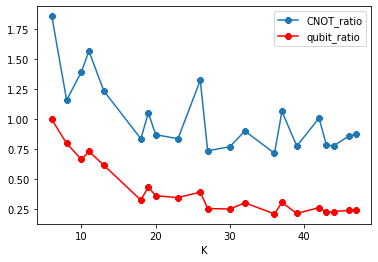

In [5]:
problem_folder = "training_set"
without_compilation(problem_folder)["CNOT_ratio"].plot(marker="8", label="CNOT_ratio")
without_compilation(problem_folder)["qubit_ratio"].plot(
    marker="8", color="red", label="qubit_ratio"
)
plt.legend()

In [6]:
# name = "EnergyForLHZGraphs2"
# titles = ["decay, line exponent 1", "decay rate 0.5 + lines", "only lines"]
# all_setting_numbers = [[2, 3, 4], [5, 6, 7], [11, 12, 13]]
# all_setting_names = [
#     [[0.1, 0.5, 1], "decay rate"],
#     [[0.5, 1, 2], "line exponent"],
#     [[1, 2, 4], "line exponent"],
# ]
# all_setting_names = all_setting_names + [[""]] * (len(all_setting_numbers) - len(all_setting_names))
# nx, ny = 1, 2
# all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

# x_axis, y_axis = 'K', 'CNOT_ratio'
# axs, min_indices = plot_settings_in_subplot(df, name, titles,
#                                             all_setting_numbers_and_names,
#                                             x_axis, y_axis, nx, ny,
#                                             figsize=(15, 7.5),
#                                             wspace=.2,
#                                             hspace=.3
#                                            )
# plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches='tight')

# # fig, ax = plt.subplots(figsize=(10, 10))
# # title = 'min indices'
# # legend_title = "legend_title"
# # setting_numbers = min_indices
# # setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# # advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

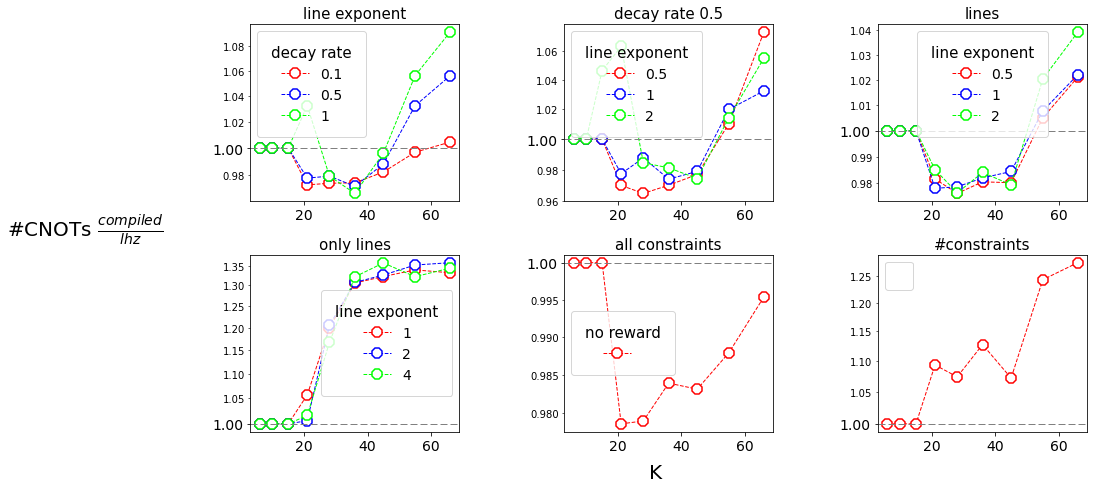

In [7]:
name = "EnergyForLHZWithCore2"
titles = [
    # "decay",
    "line exponent",
    "decay rate 0.5",
    "lines",
    "only lines",
    "all constraints",
    "#constraints",
]
all_setting_numbers = [
    #     [0, 1],
    [2, 3, 4],
    [5, 6, 7],
    [8, 9, 10],
    [11, 12, 13],
    [14],
    [15],
]
all_setting_names = [
    #     [[1, 1.5], "decay rate"],
    [[0.1, 0.5, 1], "decay rate"],
    [[0.5, 1, 2], "line exponent"],
    [[0.5, 1, 2], "line exponent"],
    [[1, 2, 4], "line exponent"],
    [[""], "no reward"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 3

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
)
# axs[2, 2].set_axis_off()
# axs[2, 1].set_axis_off()
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'min indices'
# legend_title = "legend_title"
# setting_numbers = min_indices
# setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

In [8]:
# group settings by hand
results1 = []
for idx, name in enumerate(os.listdir(paths.parameters_path / f"run_1/dictionaries")):
    print(idx, name)
    results1.append(name.split(".")[0])


dff = dict()
for name in results1:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_1/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        dff.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl


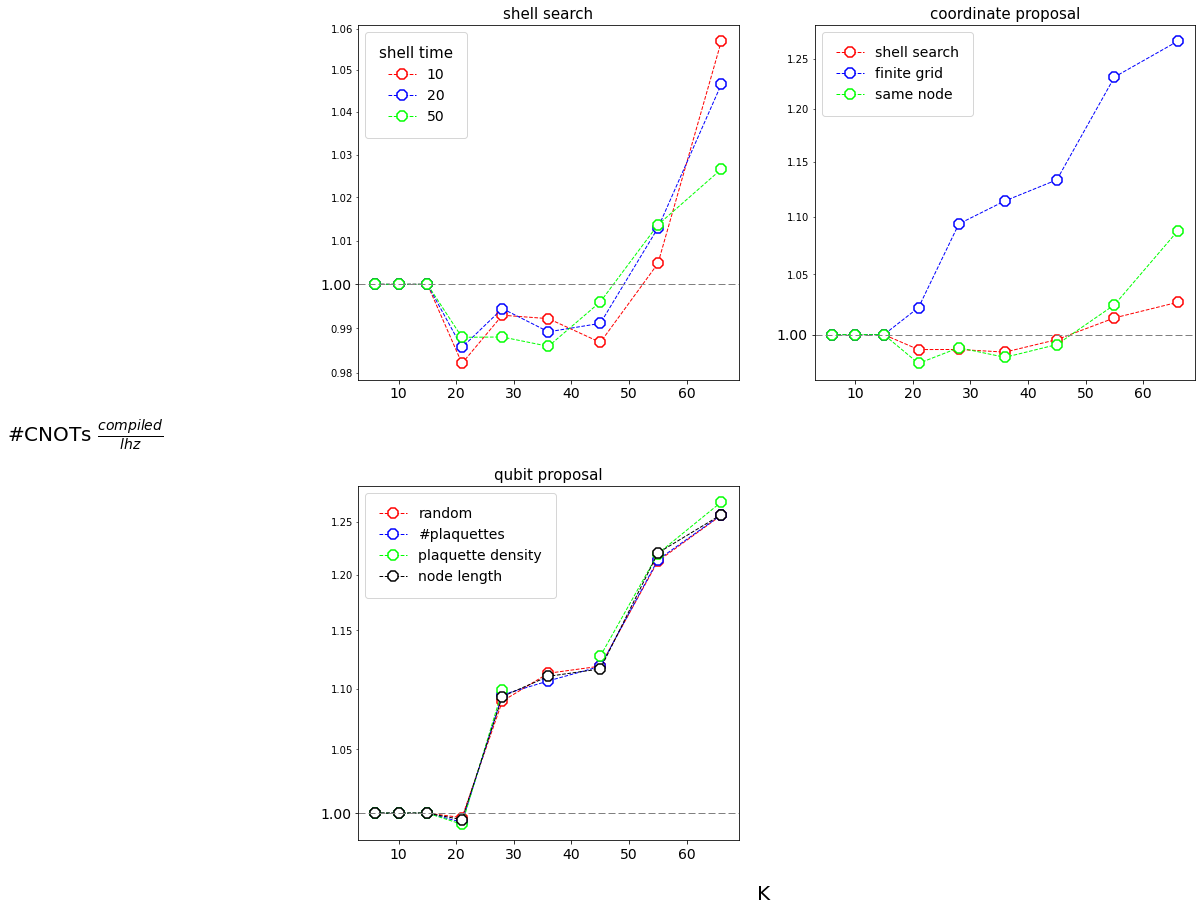

In [9]:
name = "AdvancedMcForLHZGraphsWithCore2"
titles = [
#     "swap only in core",
#     "line swaps",
#     "swap prob. decay",
    "shell search",
    "coordinate proposal",
]
all_setting_numbers = [
#     [0, 1],
#     [2, 3, 4, 8],
#     [4, 5],
    [6, 7, 8],
    [8, 9, 14],
    [8, 11, 12, 13, 14],
]
all_setting_names = [
#     [[False, True]],
#     [["5%", "15%", "45%", "0%"], "swap probability"],
#     [["decay", "no decay"]],
    [[10, 20, 50], "shell time"],
    [["shell search", "finite grid", "same node"]],
    [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 15),
    wspace=0.2,
    y_label_coord=(-0.2, 0.5),
    x_label_coord=(0.5, 0.07),
)


name = "AdvancedMcForLHZGraphsWithCore1"

titles = ["qubit proposal"]
all_setting_numbers = [[8, 9, 10, 11]]

all_setting_names = [
    [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)


all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)
nx, ny = 1, 2
x_axis, y_axis = "K", "CNOT_ratio"
plot_settings_in_subplot(
    dff,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    wspace=0.2,
    axis=axs[1, 0],
    figsize=(15, 15),
)
axs[1, 1].set_axis_off()

plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

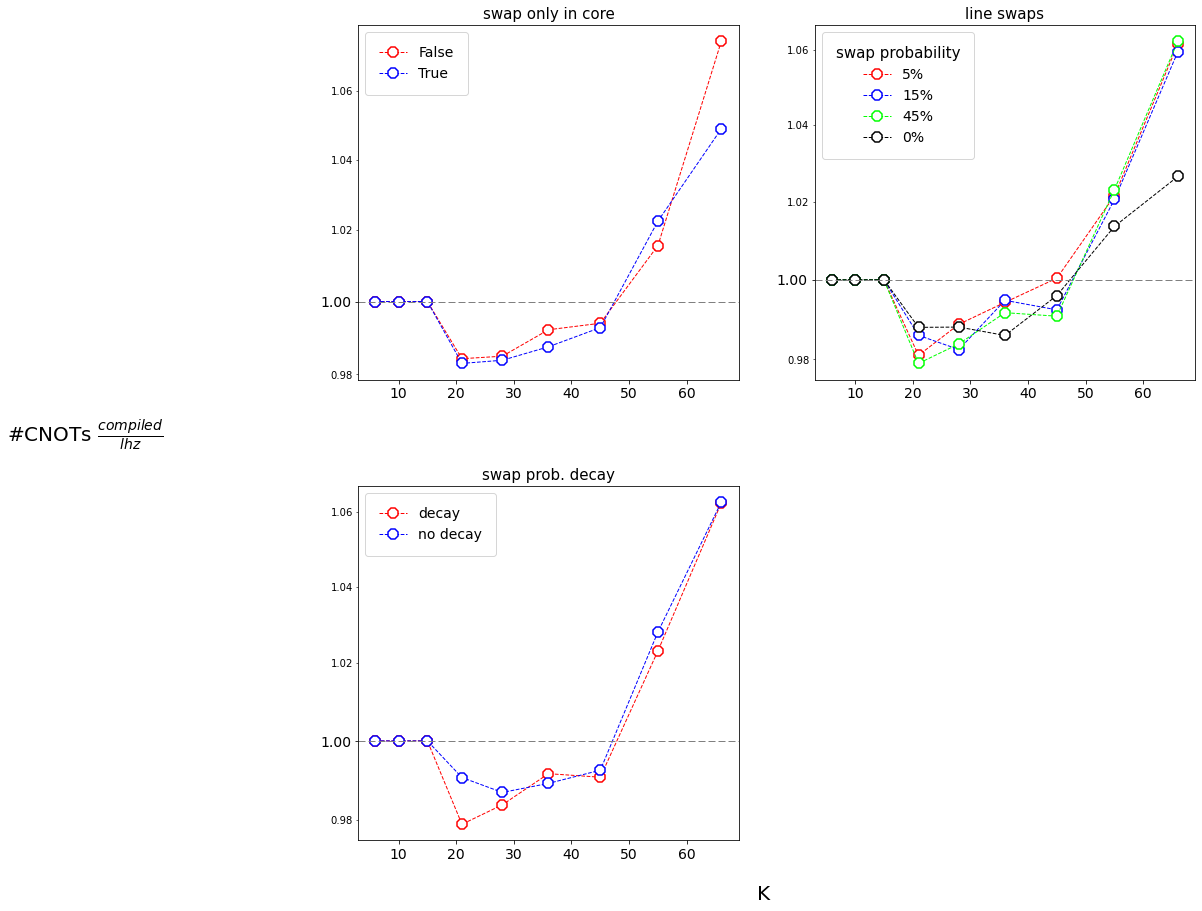

In [10]:
name = "AdvancedMcForLHZGraphsWithCore2"
titles = [
    "swap only in core",
    "line swaps",
    "swap prob. decay",
#     "shell search",
#     "coordinate proposal",
]
all_setting_numbers = [
    [0, 1],
    [2, 3, 4, 8],
    [4, 5],
#     [6, 7, 8],
#     [8, 9, 14],
#     [8, 11, 12, 13, 14],
]
all_setting_names = [
    [[False, True]],
    [["5%", "15%", "45%", "0%"], "swap probability"],
    [["decay", "no decay"]],
#     [[10, 20, 50], "shell time"],
#     [["shell search", "finite grid", "same node"]],
#     [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 15),
    wspace=0.2,
    y_label_coord=(-0.2, 0.5),
    x_label_coord=(0.5, 0.07),
)

axs[1, 1].set_axis_off()
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

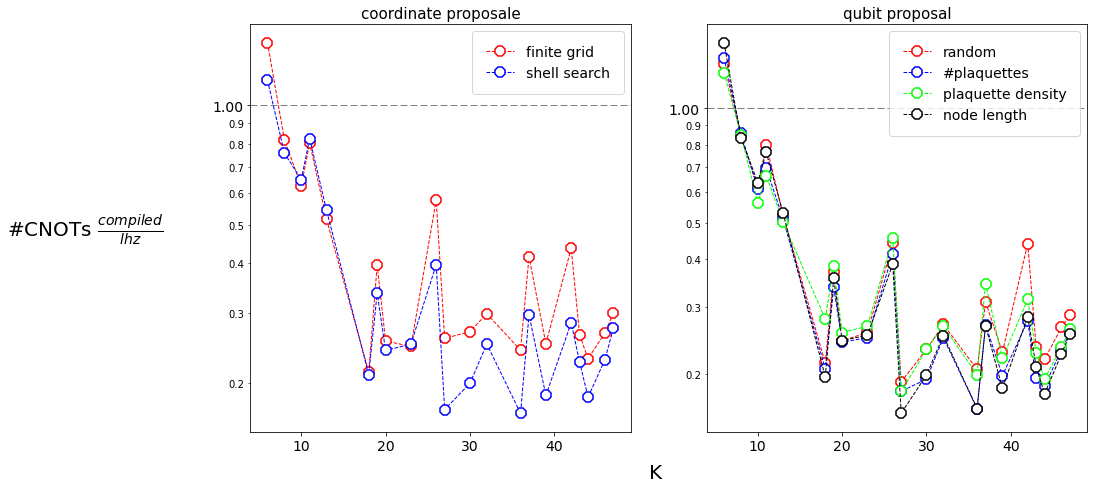

In [11]:
name = "McForDatabase2"
titles = ["coordinate proposale", "qubit proposal"]
all_setting_numbers = [[0, 1], [3, 4, 5, 6]]  # , 7],#, 2, 3],

all_setting_names = [
    [["finite grid", "shell search"]],  # , "same node"]],#, 20, 50]],
    [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    wspace=0.2,
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'min indices'
# legend_title = "legend_title"
# setting_numbers = min_indices
# setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

In [13]:
# name = "McForDatabaseWithCore2"
# titles = [
#     "swap only in core",
#     "line swaps","decay of line swaps",
#     "shell search",
#     "decay of line swaps",
#     "shell search"
# ]
# all_setting_numbers = [
#     [0, 1],
#     [2, 3, 4, 8],
#     [4, 5],
#     [6, 7, 8],
#     [15, 16, 17, 18],
#     [22, 23, 24]
# ]
# all_setting_names = [
#     [[False, True], ""],
#     [["5%", "15%", "45%"], "probability"],
#     [["decay", "no decay"], ""],
#     [[10, 20, 50], "shell time"],
#     [[0.3, 0.7, 0.9, 1], "swap prob. 90%, decay"],
#     [["50%", "75%", "90%"], "min. plaquette density"]
# ]
# all_setting_names = all_setting_names + [[""]] * (len(all_setting_numbers) - len(all_setting_names))

# nx, ny = 3, 2

# all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

# x_axis, y_axis = 'K', 'CNOT_ratio'
# axs, min_indices = plot_settings_in_subplot(df, name, titles, all_setting_numbers_and_names, x_axis, y_axis, nx, ny)
# plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches='tight')

# # fig, ax = plt.subplots(figsize=(10, 10))
# # title = 'min indices'
# # legend_title = "legend_title"
# # setting_numbers = min_indices
# # setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# # advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

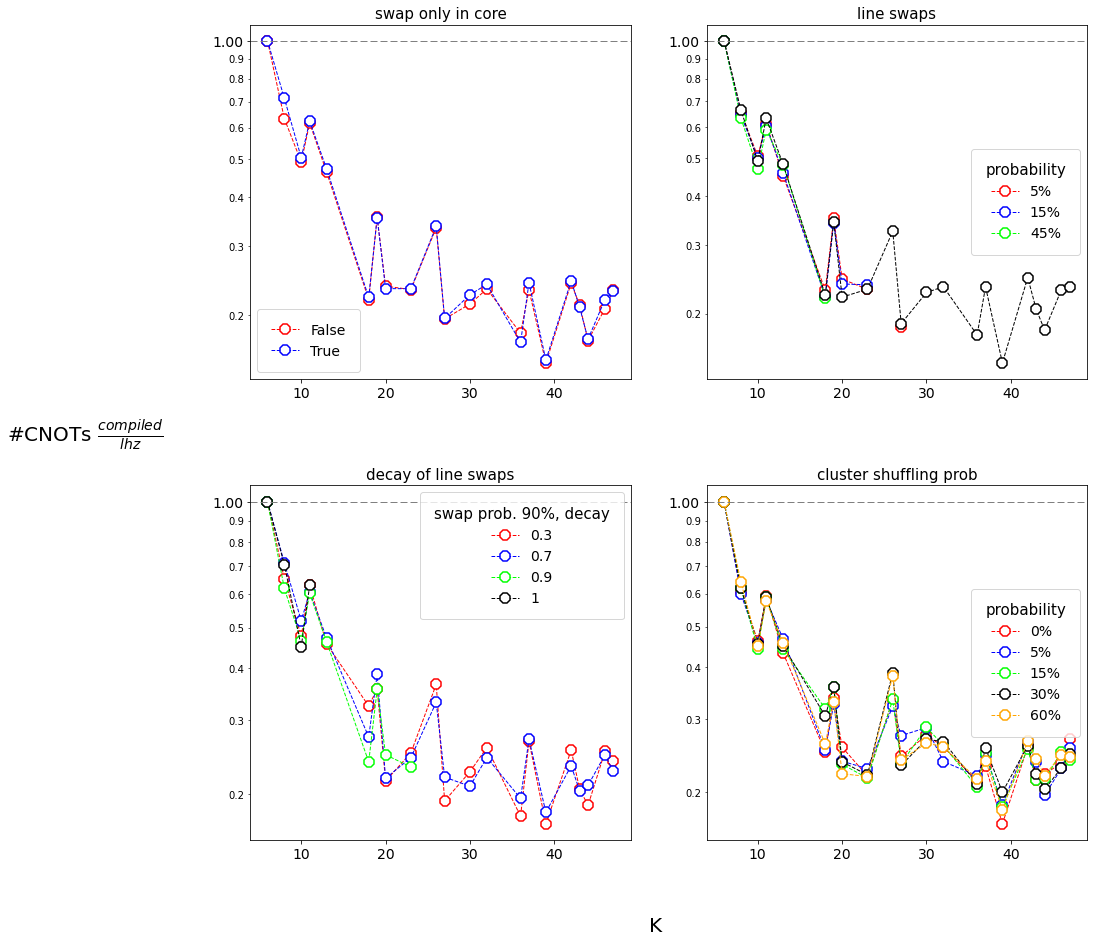

In [14]:
name = "McForDatabaseWithCore2"
titles = [
    "swap only in core",
    "line swaps",
    "decay of line swaps",
]
all_setting_numbers = [
    [0, 1],
    [2, 3, 4, 8],
    [15, 16, 17, 18],
]
all_setting_names = [
    [[False, True], ""],
    [["5%", "15%", "45%"], "probability"],
    [[0.3, 0.7, 0.9, 1], "swap prob. 90%, decay"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df, name, titles, all_setting_numbers_and_names, x_axis, y_axis, nx, ny
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

name = "CoreMcForDatabase2"

titles = [
    "cluster shuffling prob"
]  # , "ancilla prob, no delition", "ancilla prob, with delition"]
all_setting_numbers = [
    [0, 1, 2, 3, 4]
]  # , [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17]]
all_setting_names = [[["0%", "5%", "15%", "30%", "60%"], "probability"]]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 3

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    wspace=0.2,
    axis=axs[1, 1],
)
name = "McForDatabaseWithCore2"
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

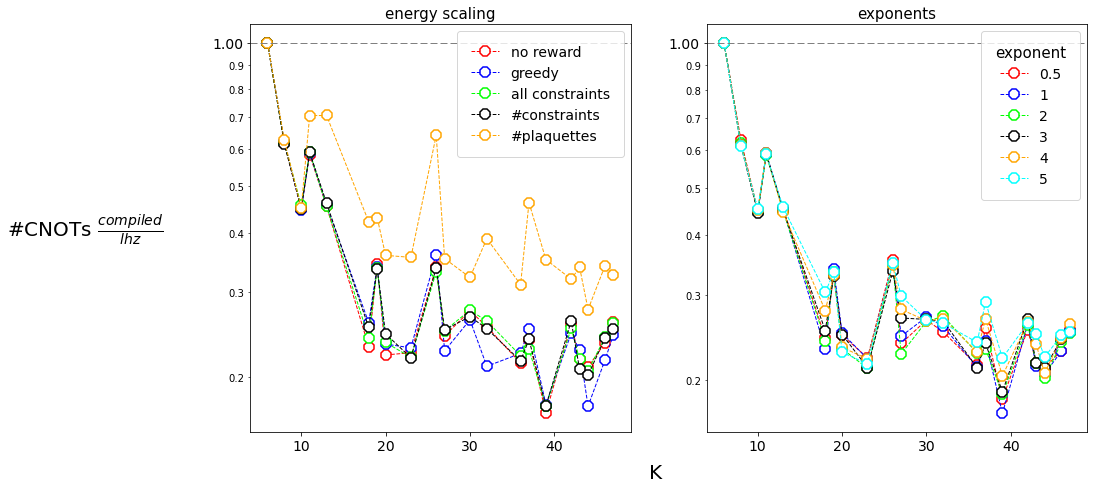

In [15]:
name = "CoreEnergyForDatabase2"
titles = ["energy scaling", "exponents"]
all_setting_numbers = [[0, 1, 2, 3, 4], [7, 8, 9, 10, 11, 12]]

all_setting_names = [
    [["no reward", "greedy", "all constraints", "#constraints", "#plaquettes"]],
    [[0.5, 1, 2, 3, 4, 5], "exponent"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    wspace=0.2,
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

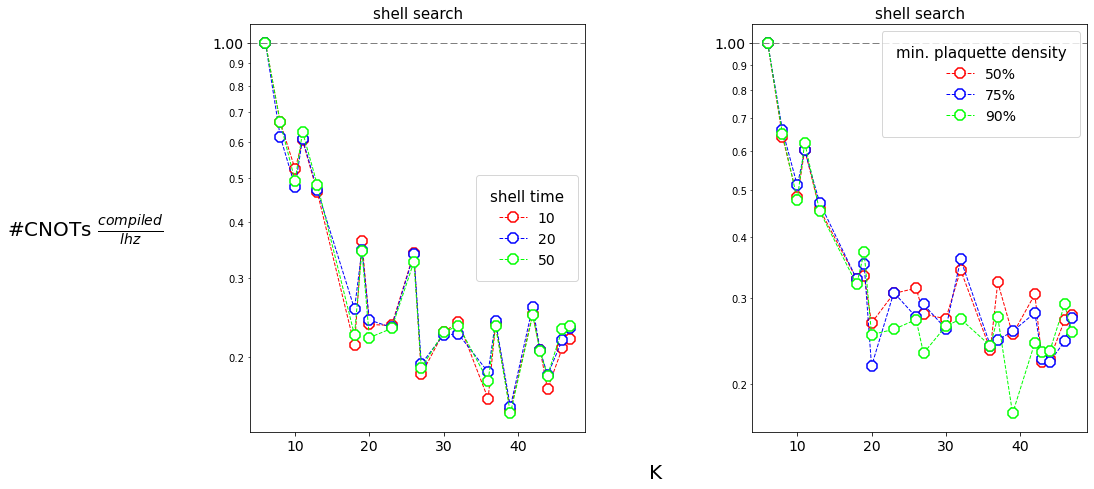

In [16]:
name = "McForDatabaseWithCore2"
titles = ["shell search", "shell search"]
all_setting_numbers = [[6, 7, 8], [22, 23, 24]]
all_setting_names = [
    [[10, 20, 50], "shell time"],
    [["50%", "75%", "90%"], "min. plaquette density"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/shell_grow.pdf", bbox_inches="tight")

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

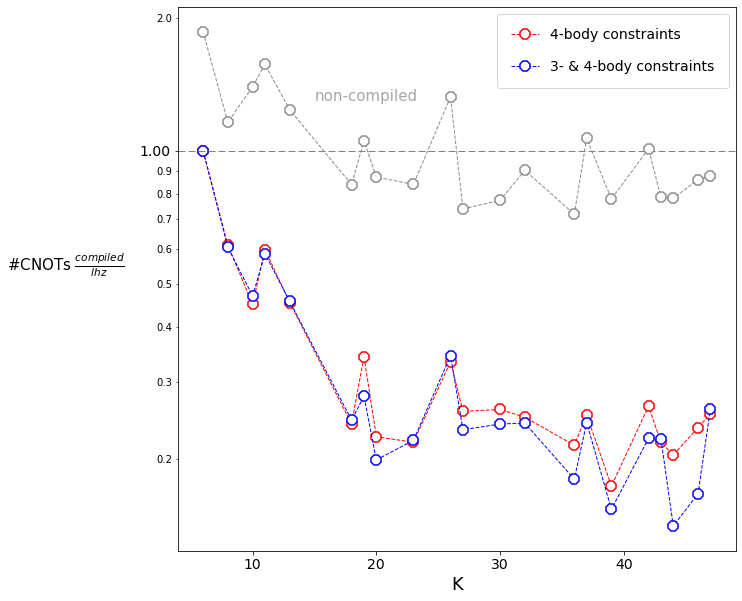

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "only squares"
legend_title = ""
setting_numbers = [5, 6]
setting_names = ["4-body constraints", "3- & 4-body constraints"]
name = "CoreEnergyForDatabase2"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_database=(15, 1.3),
)

In [18]:
# fig, ax = plt.subplots(figsize=(10, 10))
# x_axis, y_axis = 'K', 'CNOT_ratio'
# title = 'Core energy function'
# legend_title = ""
# setting_numbers = [1, 4]
# setting_names= [r"greedy reward", "#plaquettes"]
# name = "CoreEnergyForDatabase2"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax, compare=True)

In [19]:
# name = "CoreMcForDatabase2"
# titles = ["cluster shuffling prob", "ancilla prob, no delition", "ancilla prob, with delition"]
# all_setting_numbers = [[0, 1, 2, 3, 4], [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17]]
# all_setting_names = [
#     [[0, 0.05, 0.15, 0.3, 0.6], "probability"]
# ]
# all_setting_names = all_setting_names + [[""]] * (len(all_setting_numbers) - len(all_setting_names))

# nx, ny = 1, 3

# all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

# x_axis, y_axis = 'K', 'CNOT_ratio'
# axs, min_indices = plot_settings_in_subplot(df, name, titles,
#                                             all_setting_numbers_and_names,
#                                             x_axis, y_axis, nx, ny,
#                                             figsize=(15, 7.5),
#                                             wspace=.2,
#                                            )
# #plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches='tight')

# # print(min_indices)
# # fig, ax = plt.subplots(figsize=(10, 10))
# # title = 'min indices'
# # legend_title = "legend_title"
# # setting_numbers = min_indices
# # setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# # advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

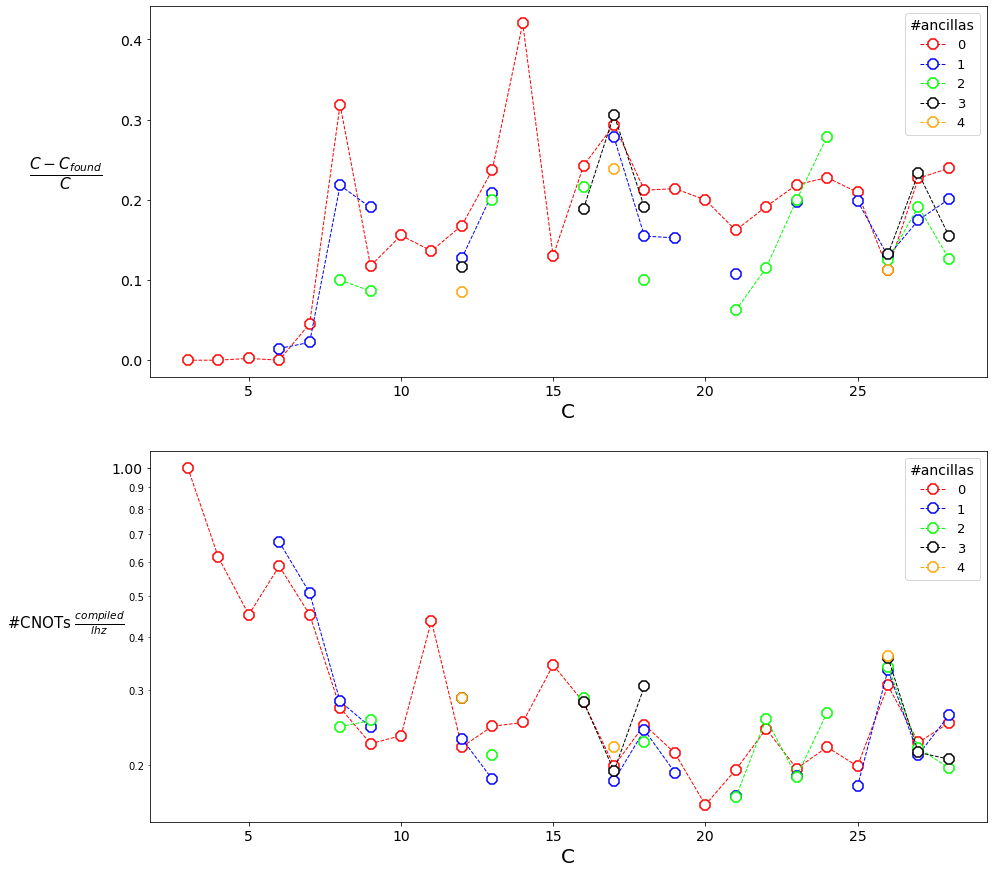

In [20]:
x_axis = "original_C"
y_axis = "C_density"
df_ = df["CoreMcForDatabase2"][df["CoreMcForDatabase2"].number_of_ancillas < 5]
df_ = df_.groupby([x_axis, "number_of_ancillas"]).mean()
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

ax[0] = (
    df_.reset_index()
    .pivot(x_axis, "number_of_ancillas", y_axis)
    .plot(
        ax=ax[0],
        marker="8",
        linestyle="--",
        lw=1,
        alpha=1,
        grid=False,
        markersize=10,
        markerfacecolor="w",
        markeredgewidth=1.5,
        color=["red", "blue", "lime", "black", "orange", "cyan", "magenta"],
    )
)
title = "ancillas"
# ax.set_title(label=title, fontsize=15)
ax[0].set_ylabel(r"$\frac{C-C_{found}}{C}$", rotation=0, fontsize=22)
ax[0].yaxis.set_label_coords(-0.1, 0.5)

ax[0].set_xlabel("C", fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[0].yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())  # <---- Added
ax[0].legend(title="#ancillas", title_fontsize=14, prop={"size": 13})


x_axis = "original_C"
y_axis = "CNOT_ratio"
df_ = df["CoreMcForDatabase2"][df["CoreMcForDatabase2"].number_of_ancillas < 5]
df_ = df_.groupby([x_axis, "number_of_ancillas"]).mean()

ax[1] = (
    df_.reset_index()
    .pivot(x_axis, "number_of_ancillas", y_axis)
    .plot(
        ax=ax[1],
        marker="8",
        linestyle="--",
        lw=1,
        alpha=1,
        grid=False,
        markersize=10,
        markerfacecolor="w",
        markeredgewidth=1.5,
        color=["red", "blue", "lime", "black", "orange", "cyan", "magenta"],
    )
)

ax[1].set_xlabel("C", fontsize=20)
# ax.set_xticks([i for i in range(min_x_axis, max_x_axis+1) if i%2==0])
# ax.set_yticks(np.arange(1, 4.2, .8))
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_yscale("log")
#      ax.set_ylim(0, 10)
ax[1].yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())  # <---- Added
ax[1].set_ylabel(r"#CNOTs $\frac{compiled}{lhz}$", rotation=0, fontsize=15)
ax[1].yaxis.set_label_coords(-0.1, 0.5)

ax[1].legend(title="#ancillas", title_fontsize=14, prop={"size": 13})
plt.savefig(paths.plots / f"ThesisFigures/Plots/ancillas.pdf", bbox_inches="tight")